In [2]:
# This is required for pymc parallel evaluation in notebooks
import summer2
import multiprocessing as mp
import platform

if platform.system() != "Windows":
    mp.set_start_method('forkserver')
    
import numpy as np
import pandas as pd
import numpy as np

import os

from summer2.extras import test_models

import estival
# The following imports are the 'building blocks' of estival models
import nevergrad as ng
# Targets represent data we are trying to fit to
from estival import targets as est
# We specify parameters using (Bayesian) priors
from estival import priors as esp
# Finally we combine these with our summer2 model in a BayesianCompartmentalModel (BCM)
from estival.model import BayesianCompartmentalModel
import inspect
from estival.wrappers import pymc as epm
import pymc as pm
import arviz as az
data = pd.read_csv('C:/Users/ajplu/Desktop/urops/covid_predict-main/covid_predict-main-ASEAN/ASEAN_files/temp.csv')
days = data.date
sicks = data.cases
incid = data.incidence
#print(days)
#print(sicks)
#print(incid)
m = test_models.sir()
defp = defp = m.get_default_parameters()

time_weight = pd.Series(1, range(len(days)))

targets = [
    est.NegativeBinomialTarget("incidence", sicks, 
        esp.UniformPrior("incidence_dispersion",(0.1, sicks.max()*0.1))) #is this stdev? If so, why is it the result of this function?
]

priors = [ #how did we get these priors?
    esp.UniformPrior("contact_rate", (0.01,1.0)),
    esp.TruncNormalPrior("recovery_rate", 0.5, 0.2, (0.01,1.0)),
]
bcm = BayesianCompartmentalModel(m, defp, priors, targets)


with pm.Model() as model:
    
    # This is all you need - a single call to use_model
    variables = epm.use_model(bcm)
    
    # The log-posterior value can also be output, but may incur additional overhead
    # Use jacobian=False to get the unwarped value (ie just the 'native' density of the priors
    # without transformation correction factors)
    # pm.Deterministic("logp", model.logp(jacobian=False))
    
    # Now call a sampler using the variables from use_model
    # In this case we use the Differential Evolution Metropolis sampler
    # See the PyMC docs for more details
    idata = pm.sample(step=[pm.DEMetropolis(variables)], draws=2000, tune=0,cores=4,chains=4)


from estival.sampling.tools import likelihood_extras_for_idata
likelihood_df = likelihood_extras_for_idata(idata, bcm)

ldf_sorted = likelihood_df.sort_values(by="logposterior",ascending=False)

#create output array
result = np.zeros((14, 2000))

for i in range(2000):
    print("I now is ")
    print(i)
    map_params = idata.posterior.to_dataframe().loc[ldf_sorted.index[i]].to_dict()
    map_res = bcm.run(map_params)
    variable = "incidence"
    for j in range(14):
        result[j,i] = map_res.derived_outputs[variable][53-(14-j)]



Population sampling (4 chains)
DEMetropolis: [contact_rate, recovery_rate, incidence_dispersion]
Attempting to parallelize chains to all cores. You can turn this off with `pm.sample(cores=1)`.


Sampling 4 chains for 0 tune and 2_000 draw iterations (0 + 8_000 draws total) took 19 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


I now is 
0
I now is 
1
I now is 
2
I now is 
3
I now is 
4
I now is 
5
I now is 
6
I now is 
7
I now is 
8
I now is 
9
I now is 
10
I now is 
11
I now is 
12
I now is 
13
I now is 
14
I now is 
15
I now is 
16
I now is 
17
I now is 
18
I now is 
19
I now is 
20
I now is 
21
I now is 
22
I now is 
23
I now is 
24
I now is 
25
I now is 
26
I now is 
27
I now is 
28
I now is 
29
I now is 
30
I now is 
31
I now is 
32
I now is 
33
I now is 
34
I now is 
35
I now is 
36
I now is 
37
I now is 
38
I now is 
39
I now is 
40
I now is 
41
I now is 
42
I now is 
43
I now is 
44
I now is 
45
I now is 
46
I now is 
47
I now is 
48
I now is 
49
I now is 
50
I now is 
51
I now is 
52
I now is 
53
I now is 
54
I now is 
55
I now is 
56
I now is 
57
I now is 
58
I now is 
59
I now is 
60
I now is 
61
I now is 
62
I now is 
63
I now is 
64
I now is 
65
I now is 
66
I now is 
67
I now is 
68
I now is 
69
I now is 
70
I now is 
71
I now is 
72
I now is 
73
I now is 
74
I now is 
75
I now is 
76
I now is 

In [6]:
for i in range(2000):
    print("I now is ")
    print(i)
    map_params = idata.posterior.to_dataframe().loc[ldf_sorted.index[i]].to_dict()
    map_res = bcm.run(map_params)
    variable = "incidence"
    for j in range(14):
        result[j,i] = map_res.derived_outputs[variable][52+j]

I now is 
0
I now is 
1
I now is 
2
I now is 
3
I now is 
4
I now is 
5
I now is 
6
I now is 
7
I now is 
8
I now is 
9
I now is 
10
I now is 
11
I now is 
12
I now is 
13
I now is 
14
I now is 
15
I now is 
16
I now is 
17
I now is 
18
I now is 
19
I now is 
20
I now is 
21
I now is 
22
I now is 
23
I now is 
24
I now is 
25
I now is 
26
I now is 
27
I now is 
28
I now is 
29
I now is 
30
I now is 
31
I now is 
32
I now is 
33
I now is 
34
I now is 
35
I now is 
36
I now is 
37
I now is 
38
I now is 
39
I now is 
40
I now is 
41
I now is 
42
I now is 
43
I now is 
44
I now is 
45
I now is 
46
I now is 
47
I now is 
48
I now is 
49
I now is 
50
I now is 
51
I now is 
52
I now is 
53
I now is 
54
I now is 
55
I now is 
56
I now is 
57
I now is 
58
I now is 
59
I now is 
60
I now is 
61
I now is 
62
I now is 
63
I now is 
64
I now is 
65
I now is 
66
I now is 
67
I now is 
68
I now is 
69
I now is 
70
I now is 
71
I now is 
72
I now is 
73
I now is 
74
I now is 
75
I now is 
76
I now is 

In [ ]:
print(map_res.derived_outputs[variable][1])

In [ ]:
#set working directory:
from pathlib import Path

# Set the working directory
path = Path("C:/Users/ajplu/Desktop/urops/covid_predict-main/covid_predict-main-ASEAN")
os.chdir(path)

In [8]:
df = pd.DataFrame(result)

# Calculate the mean by row using axis=1
row_means = df.mean(axis=1)
print(row_means)

0     2.391505
1     2.231479
2     2.081024
3     1.939742
4     1.807223
5     1.683051
6     1.566811
7     1.458088
8     1.356478
9     1.261583
10    1.173018
11    1.090411
12    1.013402
13    0.941649
dtype: float64


In [ ]:
print(row_means)

In [ ]:
len(days)

In [ ]:
m = test_models.sir()
defp = m.get_default_parameters()


In [ ]:
import rpy2.robjects.packages as rpackages

# Load the readRDS function from the base package
base = rpackages.importr('base')
readRDS = base.readRDS

# Read the RDS file
rds_data = readRDS('ASEAN_files/ASEAN_data/SG-test.rds')
exit(0)

In [ ]:
!conda install -c anaconda keras

In [ ]:
# This is required for pymc parallel evaluation in notebooks
import summer2
import multiprocessing as mp
import platform

if platform.system() != "Windows":
    mp.set_start_method('forkserver')
    
import numpy as np
import pandas as pd
import numpy as np

import os

from summer2.extras import test_models

import estival
# The following imports are the 'building blocks' of estival models
import nevergrad as ng
# Targets represent data we are trying to fit to
from estival import targets as est
# We specify parameters using (Bayesian) priors
from estival import priors as esp
# Finally we combine these with our summer2 model in a BayesianCompartmentalModel (BCM)
from estival.model import BayesianCompartmentalModel
import inspect
from estival.wrappers import pymc as epm
import pymc as pm
import arviz as az
data = pd.read_csv('C:/Users/ajplu/Desktop/urops/covid_predict-main/covid_predict-main-ASEAN/ASEAN_files/temp.csv')
days = data.date
sicks = data.cases
incid = data.incidence
#print(days)
#print(sicks)
#print(incid)
m = test_models.sir()
defp = defp = m.get_default_parameters()

time_weight = pd.Series(1, range(len(days)))

targets = [
    est.NegativeBinomialTarget("incidence", incid,time_weight,
        esp.UniformPrior("incidence_dispersion",(0.1, sicks.max()*0.1))) #is this stdev? If so, why is it the result of this function?
]
print("past")
print(targets)
priors = [ #how did we get these priors?
    esp.UniformPrior("contact_rate", (0.01,1.0)),
    esp.TruncNormalPrior("recovery_rate", 0.5, 0.2, (0.01,1.0)),
]
bcm = BayesianCompartmentalModel(m, defp, priors, targets)

print("past")

with pm.Model() as model:
    
    # This is all you need - a single call to use_model
    variables = epm.use_model(bcm)
    print("variables is")
    print(variables)
    
    # The log-posterior value can also be output, but may incur additional overhead
    # Use jacobian=False to get the unwarped value (ie just the 'native' density of the priors
    # without transformation correction factors)
    # pm.Deterministic("logp", model.logp(jacobian=False))
    
    # Now call a sampler using the variables from use_model
    # In this case we use the Differential Evolution Metropolis sampler
    # See the PyMC docs for more details
    idata = pm.sample(step=[pm.DEMetropolis(variables)], draws=2000, tune=0,cores=4,chains=4)


from estival.sampling.tools import likelihood_extras_for_idata
likelihood_df = likelihood_extras_for_idata(idata, bcm)

ldf_sorted = likelihood_df.sort_values(by="logposterior",ascending=False)

#create output array
result = np.zeros((14, 2000))

# Extract the parameters from the calibration samples
map_params = idata.posterior.to_dataframe().loc[ldf_sorted.index[0]].to_dict()

#run with these parameters
map_res = bcm.run(map_params)




done
4.927501184523571


<Axes: >

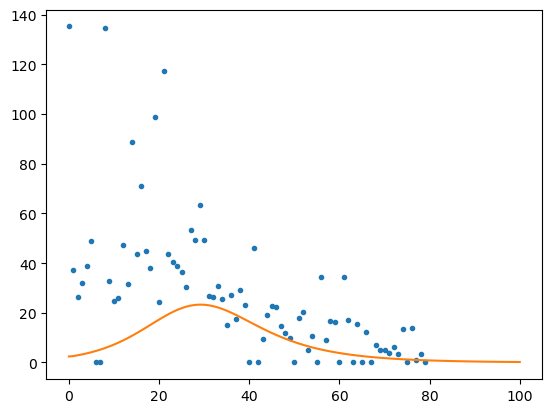

In [182]:
import summer2
import numpy as np
import pandas as pd
from summer2.extras import test_models
# The following imports are the 'building blocks' of estival models

# Targets represent data we are trying to fit to
from estival import targets as est

# We specify parameters using (Bayesian) priors
from estival import priors as esp

# Finally we combine these with our summer2 model in a BayesianCompartmentalModel (BCM)
from estival.model import BayesianCompartmentalModel


# Import nevergrad
import nevergrad as ng

# Import our convenience wrapper
from estival.wrappers.nevergrad import optimize_model


data = pd.read_csv('C:/Users/ajplu/Desktop/urops/covid_predict-main/covid_predict-main-ASEAN/ASEAN_files/temp.csv')
days = data.date
sicks = data.cases
incid = data.incidence
#print(days)
#print(sicks)
#print(incid)
m = test_models.sir()
defp = defp = m.get_default_parameters()

time_weight = pd.Series(1, range(len(days)))

targets = [
    est.NegativeBinomialTarget("incidence", incid, 
        esp.UniformPrior("incidence_dispersion",(0.1, incid.max()*0.1))) #is this stdev? If so, why is it the result of this function?
]

priors = [ #how did we get these priors?
    esp.UniformPrior("contact_rate", (0.01,1.0)),
    esp.TruncNormalPrior("recovery_rate", 0.5, 0.2, (0.01,1.0)),
]

print("done")

bcm = BayesianCompartmentalModel(m, m.get_default_parameters(), priors, targets)



opt_class = ng.optimizers.TwoPointsDE
orunner = optimize_model(bcm, opt_class=opt_class)


# Run the minimizer for a specified 'budget' (ie number of evaluations)
rec = orunner.minimize(5000)
# Print the loss (objective function value) of the current recommended parameters
print(rec.loss)

mle_params = rec.value[1]
res = bcm.run(mle_params)
target = "incidence"

# You can access the targets from the BCM
bcm.targets[target].data.plot(style='.')
res.derived_outputs[target].plot()


<Axes: >

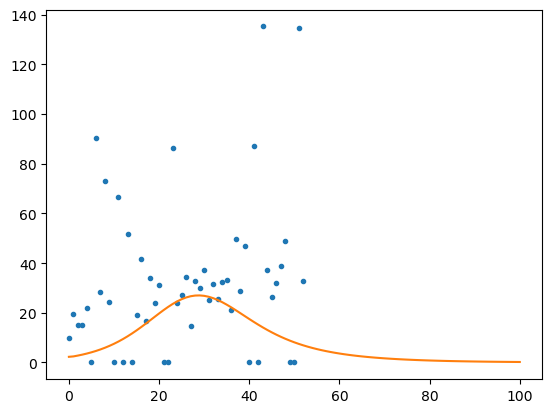

In [162]:
res = bcm.run(mle_params)
target = "incidence"

# You can access the targets from the BCM
bcm.targets[target].data.plot(style='.')
res.derived_outputs[target].plot()


In [180]:
res.derived_outputs[target][85]

0.17304196101120334

In [156]:
import inspect
print(inspect.getsource(BayesianCompartmentalModel))

class BayesianCompartmentalModel:
    def __init__(
        self,
        model: CompartmentalModel,
        parameters: dict,
        priors: list,
        targets: list,
        extra_ll=None,
    ):
        self.model = model

        self._model_parameters = model.get_input_parameters()

        self.parameters = parameters
        self.targets: Dict[str, BaseTarget] = _named_list_to_dict(targets)

        for t in targets:
            priors = priors + t.get_priors()
        self.priors: Dict[str, BasePrior] = _named_list_to_dict(priors)

        self._ref_idx = self.model._get_ref_idx()
        if not isinstance(self._ref_idx, pd.Index):
            self._ref_idx = pd.Index(self._ref_idx)
        self.epoch = self.model.get_epoch()

        self._build_logll_funcs(extra_ll)

        from .utils.sample import SampledPriorsManager

        self.sample = SampledPriorsManager(self.priors)

    def _construct_targets(self, targets: list) -> Dict[str, BaseTarget]:
        tdict = {}

 

In [ ]:
#pip install jax[cpu]==0.4.23 -f https://whls.blob.core.windows.net/unstable/index.html
#!pip install git+https://github.com/monash-emu/summer2.git
#!pip uninstall numba -y
#!pip uninstall librosa -y
#!pip install estival==0.4.4 numpy==1.24.3
#!pip install pyreadr